In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib.ticker import FormatStrFormatter

In [2]:
#defining path
path = r'C:\Users\User\OneDrive\Dokumentumok\CF\Phyton\Instacart Basket Analysis'

In [42]:
#importing the department dataframe
df_dep = pd.read_csv(r'C:\Users\User\OneDrive\Dokumentumok\CF\Phyton\Instacart Basket Analysis\02 Data\Original Data\departments.csv')

In [4]:
#importing the high_activity_customers dataframe
df_high_activity_customers = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers.pkl'))

#### 05 Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### Planning profile categories

#### Young Adult
Filter: 18 <'Age'< 25
Characteristics: Individuals aged 18 to 24.
Behaviors: Varied product interests, may prioritize convenience and affordability, flexible shopping schedule.

#### Single adult
Filter: 'Age' > 18 and 'n_dependants' = 0
Characteristics: Individuals over 18 with no dependents.
Behaviors: Independent shopping habits, potentially interested in single-serving or smaller portion sizes, may prioritize convenience.

#### Young parent
Filter: 'Age'< 35 and 'n_dependants' > 0
Characteristics: Individuals aged to 34 with one or more dependents.
Behaviors: Family-oriented purchases, buys baby and child-related products, may prioritize convenience and time-saving items.

#### Busy Professional:
Filter: 'income' is in the upper 30%, 
Characteristics: High income, limited time for shopping.
Behaviors: Prefers quick and convenient online shopping, frequently orders prepared meals.
    
#### Big Family Shopper:
Filter: 'n_dependants' > 2
Characteristics: Parents with many children, larger households.
Behaviors: Buys in bulk, focuses on family-friendly products.

In [5]:
# create a function called young_adult_profile

def young_adult_profile(row):
    if 18 < row['Age'] < 25:
        return 'yes'
    elif row['Age'] >= 25 or row['Age'] <= 18:
        return 'no'
    else:
        return 'Not enough data'

In [6]:
#create a new column for young_adult_profile
df_high_activity_customers['young_adult_profile'] = df_high_activity_customers.apply(young_adult_profile, axis=1)

In [7]:
df_high_activity_customers['young_adult_profile'].value_counts()

young_adult_profile
no     28053904
yes     2939585
Name: count, dtype: int64

In [8]:
#export dataframe
df_high_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers.pkl'))

In [9]:
# create a function called single_adult_profile

def single_adult_profile(row):

  if 1 > row['n_dependants']  and 18 < row['Age']:
    return 'yes'
  elif 1 <= row['n_dependants'] or  18 > row['Age']:
    return 'no'
  else: return 'Not enough data'

In [10]:
#create a new column for single_adult_profile
df_high_activity_customers['single_adult_profile'] = df_high_activity_customers.apply(single_adult_profile, axis=1)

In [11]:
df_high_activity_customers['single_adult_profile'].value_counts()

single_adult_profile
no                 23246306
yes                 7627849
Not enough data      119334
Name: count, dtype: int64

In [12]:
#export dataframe
df_high_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers.pkl'))

In [13]:
# create a function called Young parent_profile
    
def young_parent_profile(row):
    if 1 <= row['n_dependants'] and 18 <= row['Age'] <= 35:
        return 'yes'
    elif 1 > row['n_dependants'] or 18 > row['Age'] or 35 < row['Age']:
        return 'no'
    else:
        return 'Not enough data'


In [14]:
#create a new column for young_parent_profile
df_high_activity_customers['young_parent_profile'] = df_high_activity_customers.apply(young_parent_profile, axis=1)

In [15]:
df_high_activity_customers['young_parent_profile'].value_counts()

young_parent_profile
no     24426244
yes     6567245
Name: count, dtype: int64

In [16]:
#export dataframe
df_high_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers.pkl'))

In [19]:
#calculate the upper 30% of incomes
q = df_high_activity_customers['income'].quantile(0.70)
print (q)

119517.0


In [20]:
# create a function called Busy Professional_profile

def busy_professional_profile(row):

  if  q < row['income'] :
    return 'yes'
  elif q >= row['income'] :
    return 'no'
  else: return 'Not enough data'

In [21]:
#create a new column for busy_professional_profile
df_high_activity_customers['busy_professional_profile'] = df_high_activity_customers.apply(busy_professional_profile, axis=1)

In [22]:
df_high_activity_customers['busy_professional_profile'].value_counts()

busy_professional_profile
no     21695504
yes     9297985
Name: count, dtype: int64

In [23]:
#export dataframe
df_high_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers.pkl'))

In [27]:
#create function to Big Family Shopper profile
def big_family_profile(row):

  if 2 < row['n_dependants']:
    return 'yes'
  elif 2 >= row['n_dependants']:
    return 'no'
  else: return 'Not enough data'

In [28]:
#create a new column for big_family_profile
df_high_activity_customers['big_family_profile'] = df_high_activity_customers.apply(big_family_profile, axis=1)

In [29]:
df_high_activity_customers['big_family_profile'].value_counts()

big_family_profile
no     23213851
yes     7779638
Name: count, dtype: int64

In [30]:
#export dataframe
df_high_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers.pkl'))

#### 06 Create an appropriate visualization to show the distribution of profiles.

In [9]:
#create dataframe to barchart
df_bar = pd.DataFrame({'young_adult_profile' : df_high_activity_customers['young_adult_profile'].value_counts('yes'),
                       'single_adult_profile' : df_high_activity_customers['single_adult_profile'].value_counts('yes'),
                       'busy_professional_profile' : df_high_activity_customers['busy_professional_profile'].value_counts('yes'),
                       'young_parent_profile' : df_high_activity_customers['young_parent_profile'].value_counts('yes'),
                       'big_family_profile' : df_high_activity_customers['big_family_profile'].value_counts('yes')})
                       

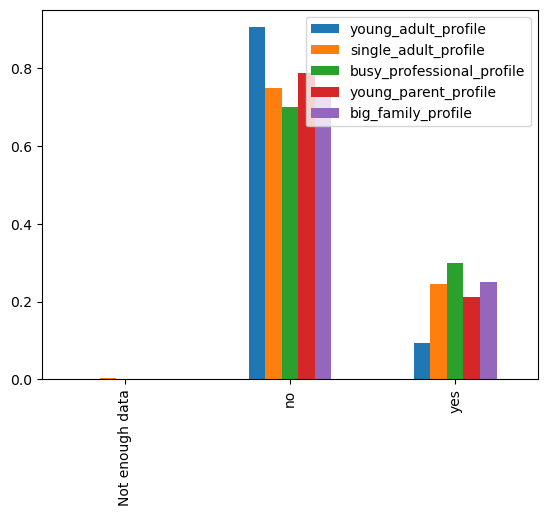

In [10]:
# Create a bar chart with logarithmic scale on the y-axis

bar = df_bar.plot.bar()


In [11]:
# exporting chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profiles2.png'))

<Figure size 640x480 with 0 Axes>

#### 07 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [41]:
# subset df_big_fam
df_big_fam = df_high_activity_customers[df_high_activity_customers['big_family_profile'] == 'yes']

In [42]:
df_big_fam.shape

(7779638, 40)

In [43]:
df_big_fam.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_prices',
       'spender_type', 'median_days_since_prior_order', 'customer_frequency',
       'First Name', 'Surname', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge', 'max_order_number',
       'customer_activity', 'young_adult_profile', 'single_adult_profile',
       'young_parent_profile', 'busy_professional_profile',
       'big_family_profile'],
      dtype='object')

In [47]:
# usage frequency
df_big_fam['days_since_prior_order'].max()

30.0

In [48]:
# usage frequency
df_big_fam['days_since_prior_order'].min()

0.0

In [60]:
# usage frequency
df_big_fam['days_since_prior_order'].median()

7.0

In [61]:
# expenditure
df_big_fam['mean_prices'].max()

10209.987755102042

In [62]:
df_big_fam['mean_prices'].min()

1.2625000000000002

In [63]:
df_big_fam['mean_prices'].mean()

11.78953995738821

#### 08 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [5]:
# create a new column to summerize the customer profiles

df_high_activity_customers.loc[df_high_activity_customers['young_adult_profile'] == 'yes', 'customer_profile_sum'] = 'young_adult'
df_high_activity_customers.loc[df_high_activity_customers['single_adult_profile'] == 'yes', 'customer_profile_sum'] = 'single_adult'
df_high_activity_customers.loc[df_high_activity_customers['busy_professional_profile'] == 'yes', 'customer_profile_sum'] = 'busy_professional'
df_high_activity_customers.loc[df_high_activity_customers['young_parent_profile'] == 'yes', 'customer_profile_sum'] = 'young_parent'
df_high_activity_customers.loc[df_high_activity_customers['big_family_profile'] == 'yes', 'customer_profile_sum'] = 'big_family'

In [6]:
# check the new column
df_high_activity_customers.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_prices',
       'spender_type', 'median_days_since_prior_order', 'customer_frequency',
       'First Name', 'Surname', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge', 'max_order_number',
       'customer_activity', 'young_adult_profile', 'single_adult_profile',
       'young_parent_profile', 'busy_professional_profile',
       'big_family_profile', 'customer_profile_sum'],
      dtype='object')

In [9]:
#create a new column, 'region' and collect the Northest Region States
df_high_activity_customers.loc[df_high_activity_customers['STATE'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 
                    'Pennsylvania', 'New Jersey']), 'region'] = 'Region_Northeast'

In [11]:
#create 'Region_Midwest'
df_high_activity_customers.loc[df_high_activity_customers['STATE'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska',
                  'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Region_Midwest'

In [12]:
#create 'Region_South'
df_high_activity_customers.loc[df_high_activity_customers['STATE'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina',
                'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama',
                'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'Region_South'

In [13]:
#create 'Region_West'
df_high_activity_customers.loc[df_high_activity_customers['STATE'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
               'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'Region_West'

In [14]:
df_high_activity_customers.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_prices',
       'spender_type', 'median_days_since_prior_order', 'customer_frequency',
       'First Name', 'Surname', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge', 'max_order_number',
       'customer_activity', 'young_adult_profile', 'single_adult_profile',
       'young_parent_profile', 'busy_professional_profile',
       'big_family_profile', 'customer_profile_sum', 'region'],
      dtype='object')

In [16]:
df_high_activity_customers.head(150)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,_merge,max_order_number,customer_activity,young_adult_profile,single_adult_profile,young_parent_profile,busy_professional_profile,big_family_profile,customer_profile_sum,region
0,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138,28.0,6.0,11.0,...,both,32.0,high-activity customer,no,no,no,no,no,NaN,Region_Midwest
1,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138,30.0,6.0,17.0,...,both,32.0,high-activity customer,no,no,no,no,no,NaN,Region_Midwest
2,907,Premium Sliced Bacon,106.0,12.0,20.0,3160996.0,138,1.0,5.0,13.0,...,both,32.0,high-activity customer,no,no,no,no,no,NaN,Region_Midwest
3,907,Premium Sliced Bacon,106.0,12.0,20.0,2254091.0,138,10.0,5.0,14.0,...,both,32.0,high-activity customer,no,no,no,no,no,NaN,Region_Midwest
4,1000,Apricots,18.0,10.0,12.9,505689.0,138,9.0,6.0,12.0,...,both,32.0,high-activity customer,no,no,no,no,no,NaN,Region_Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,46802,Pineapple Chunks,116.0,1.0,1.8,2329217.0,138,32.0,5.0,20.0,...,both,32.0,high-activity customer,no,no,no,no,no,NaN,Region_Midwest
146,48812,Variety Pack,85.0,17.0,9.0,894221.0,138,23.0,5.0,13.0,...,both,32.0,high-activity customer,no,no,no,no,no,NaN,Region_Midwest
147,49463,Organic Whole Bean Coffee,26.0,7.0,6.2,1069065.0,138,31.0,2.0,7.0,...,both,32.0,high-activity customer,no,no,no,no,no,NaN,Region_Midwest
148,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,389851.0,709,2.0,0.0,21.0,...,both,5.0,high-activity customer,no,no,no,yes,no,busy_professional,Region_Northeast


In [17]:
#export dataframe
df_high_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers.pkl'))

#### 8a Compare your customer profiles with regions


In [5]:
# subset df
df_profiles = df_high_activity_customers.dropna(subset=['customer_profile_sum'])

In [6]:
df_profiles_chart = df_profiles[['department_id', 'user_id', 'add_to_cart_order', 'mean_prices', 'customer_profile_sum', 'region']]

In [20]:
df_profiles_chart.columns

Index(['department_id', 'user_id', 'add_to_cart_order', 'mean_prices',
       'customer_profile_sum', 'region'],
      dtype='object')

In [21]:
df_profiles_chart.head()

,department_id,user_id,add_to_cart_order,mean_prices,customer_profile_sum,region
148,19.0,709,20.0,7.930208,busy_professional,Region_Northeast
149,7.0,709,33.0,7.930208,busy_professional,Region_Northeast
150,7.0,709,17.0,7.930208,busy_professional,Region_Northeast
151,7.0,709,34.0,7.930208,busy_professional,Region_Northeast
152,17.0,709,25.0,7.930208,busy_professional,Region_Northeast


In [6]:
df_profiles.shape

(24335947, 42)

In [22]:
df_profiles_chart.shape

(24335947, 6)

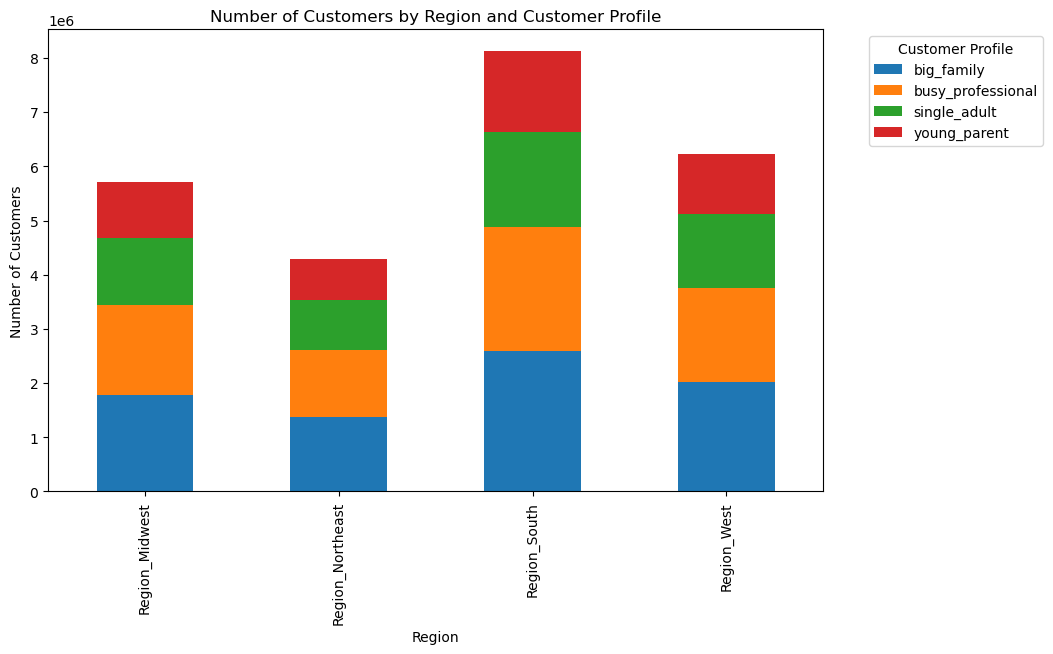

In [25]:
# Group by 'region' and 'customer_profile_sum' and count the occurrences
grouped_df = df_profiles_chart.groupby(['region', 'customer_profile_sum']).size().unstack(fill_value=0)

# Plotting
bar2 = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Region and Customer Profile')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [26]:
# exporting chart
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profiles_by_region.png'))

#### 8b Compare your customer profiles with departments.

In [43]:
df_dep = df_dep.T

In [45]:
df_dep.columns

RangeIndex(start=0, stop=1, step=1)

In [39]:
# 1) Create a new header
new_header = df_dep.iloc[0]

# 2) Remove the first row in the dataframe
# actually it makes a new df without the first row of the old one
df_dep_t_new = df_dep[1:]

# 3) Add the new header. 
df_dep_t_new.columns = new_header

In [47]:
df_dep_t_new.head()

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol


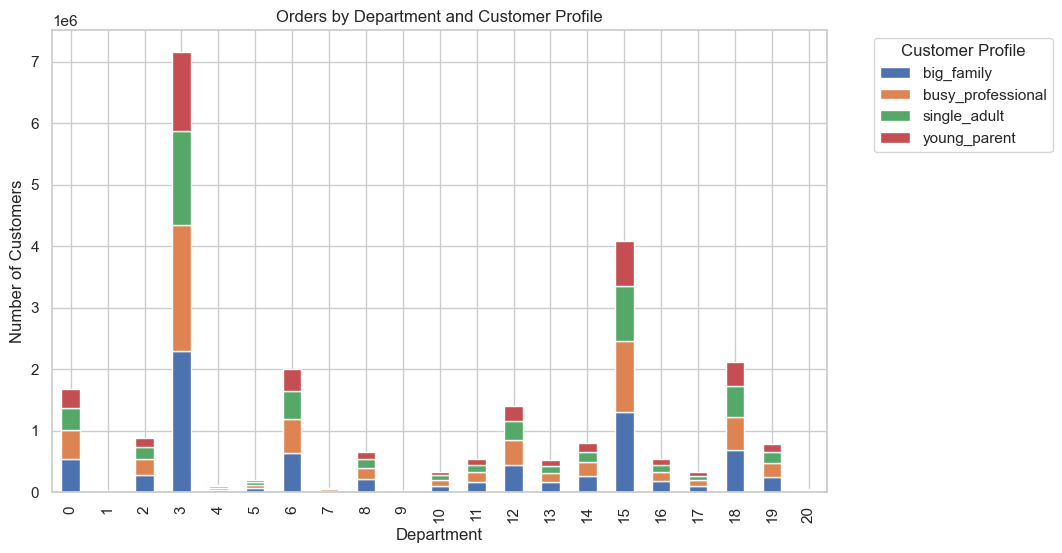

In [78]:
from matplotlib.ticker import FormatStrFormatter

# Group by 'department' and 'customer_profile_sum' and count the occurrences
grouped_df = df_profiles_chart.groupby(['department_id', 'customer_profile_sum']).size().unstack(fill_value=0)

# Plotting

bar3 = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))

bar3.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.xlabel('Department')
plt.ylabel('Number of Customers')
plt.title('Orders by Department and Customer Profile')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [28]:
# exporting chart
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profiles_department.png'))

In [29]:
#export dataframe
df_profiles.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'only_profiled_customers.pkl'))

In [30]:
#export dataframe
df_profiles_chart.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'profiled_to_charts.pkl'))

In [3]:
#import df
df_profiles = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'profiled_to_charts.pkl'))

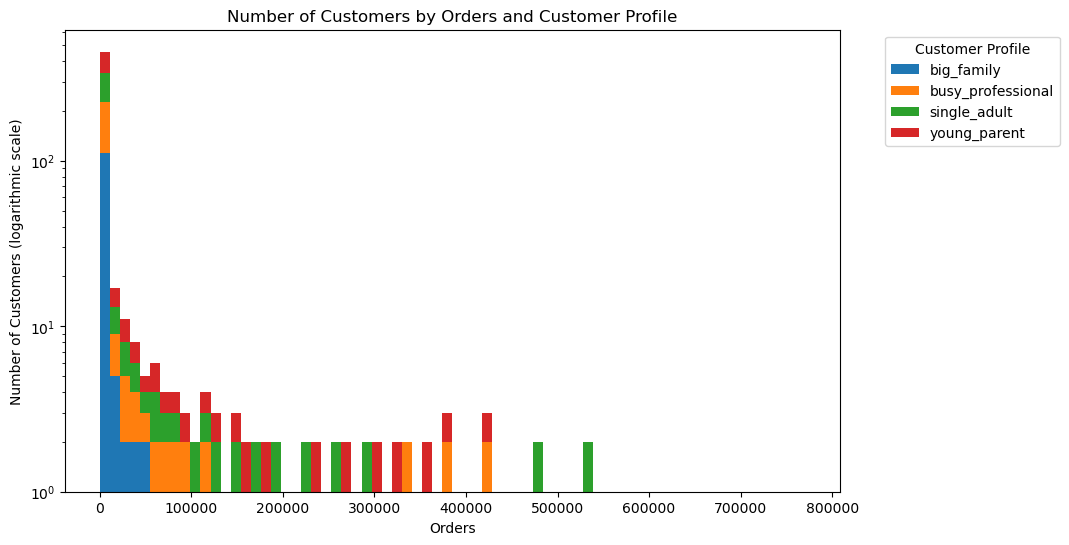

In [10]:
# Group by 'department' and 'customer_profile_sum' and count the occurrences
grouped4_df = df_profiles.groupby(['add_to_cart_order', 'customer_profile_sum']).size().unstack(fill_value=0)

# Plotting
bar4 = grouped4_df.plot(kind='hist', bins=70, stacked=True, figsize=(10, 6))
plt.xlabel('Orders')
plt.ylabel('Number of Customers (logarithmic scale)')
plt.yscale('log') 
plt.title('Number of Customers by Orders and Customer Profile')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [11]:
# exporting chart
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profiles_by_orders.png'))